In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def mean_reversion_strategy(prices, window):
    # Calculate the moving average of the prices over the given window
    moving_average = prices.rolling(window).mean()

    # Calculate the standard deviation of the prices over the given window
    standard_deviation = prices.rolling(window).std()

    # Calculate the z-score, which measures how many standard deviations a price is from the moving average
    z_score = (prices - moving_average) / standard_deviation

    # Create a boolean array that indicates when the z-score is below -1 or above 1
    entry_exit = np.zeros(len(prices))
    entry_exit[z_score < -1.5] = -1
    entry_exit[z_score > 1.5] = 1

    # Calculate the returns of the strategy, assuming a long position when the z-score is below -1 and a short position when the z-score is above 1
    returns = entry_exit * prices

    return returns


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


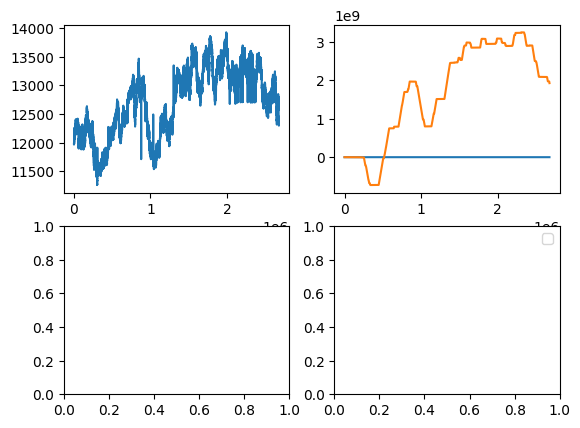

In [7]:
# Load the prices of a stock into a pandas DataFrame
prices = pd.read_csv("vol-75-1s.csv")
prices["ts"] = pd.to_datetime(prices["ts"])

# Apply the mean reversion strategy to the prices
returns = mean_reversion_strategy(prices["spot"], window=200000)

# Calculate the cumulative returns of the strategy
cumulative_returns = returns.cumsum()

fig, axes = plt.subplots(2,2)
# axes[0,0].plot(prices.rolling(1000).mean())
axes[0,0].plot(prices["spot"], label="price")
axes[0,1].plot(returns, label="Returns")
axes[0,1].plot(cumulative_returns, label="Cumulative Returns")

plt.legend()
plt.show()

# plt.plot(returns, label="Returns")
# plt.plot(cumulative_returns, label="Cumulative Returns")
# plt.plot(prices["spot"], label="price")
# plt.legend()
# plt.show()



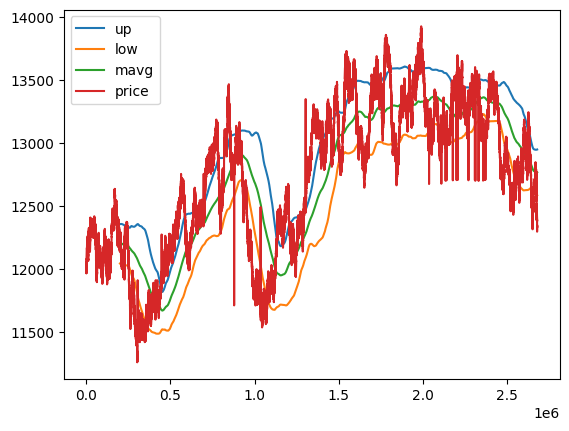

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prices = pd.read_csv("vol-75-1s.csv")
prices["ts"] = pd.to_datetime(prices["ts"])

moving_average = prices["spot"].rolling(200000).mean()

# Calculate the standard deviation of the prices over the given window
standard_deviation = prices["spot"].rolling(200000).std()

upper_boundary = moving_average + standard_deviation
lower_boundary = moving_average - standard_deviation

plt.plot(upper_boundary, label="up")
plt.plot(lower_boundary, label="low")
plt.plot(moving_average, label="mavg")
plt.plot(prices['spot'], label="price")

plt.legend()
plt.show()